In [6]:
import pandas as pd

# Load the dataset from the specified path
df = pd.read_csv('/content/Fish[1].csv')

# Display the first 5 rows of the dataset to understand its structure
print("Dataset Head:")
display(df.head())

Dataset Head:


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
print("\nDataset Info:")
# Display basic information about the dataset, including data types and non-null values
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
print("\nDataset Description:")
# Display descriptive statistics for numerical columns
display(df.describe())


Dataset Description:


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### **Correlation Analysis**



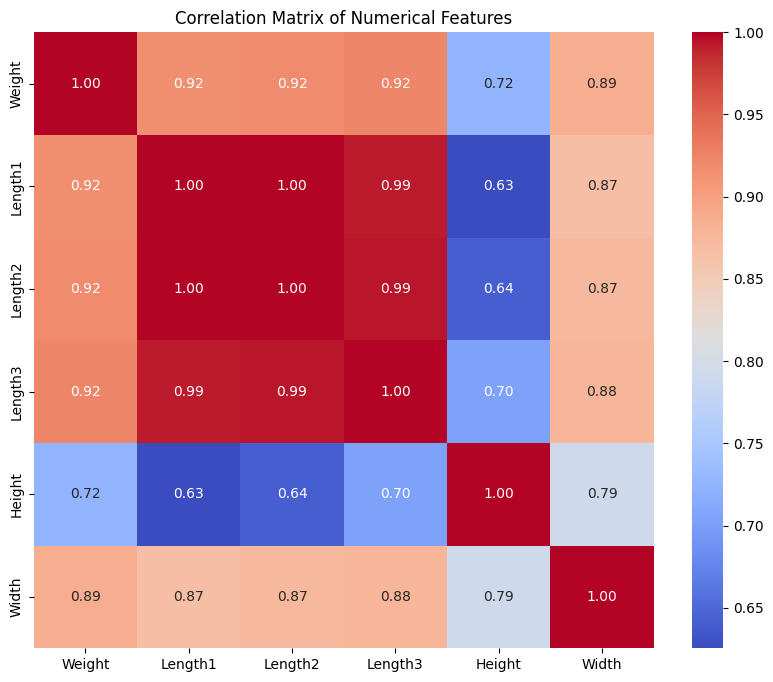

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Simple Linear Regression**



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define independent (X) and dependent (y) variables
# We'll use 'Length2' as the independent variable and 'Weight' as the dependent variable
X = df[['Length2']]
y = df['Weight']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Coefficients (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Model Coefficients (Slope): 30.43
Model Intercept: -477.31
Mean Squared Error (MSE): 25604.52
R-squared (R2) Score: 0.82


### **Regression Plot**



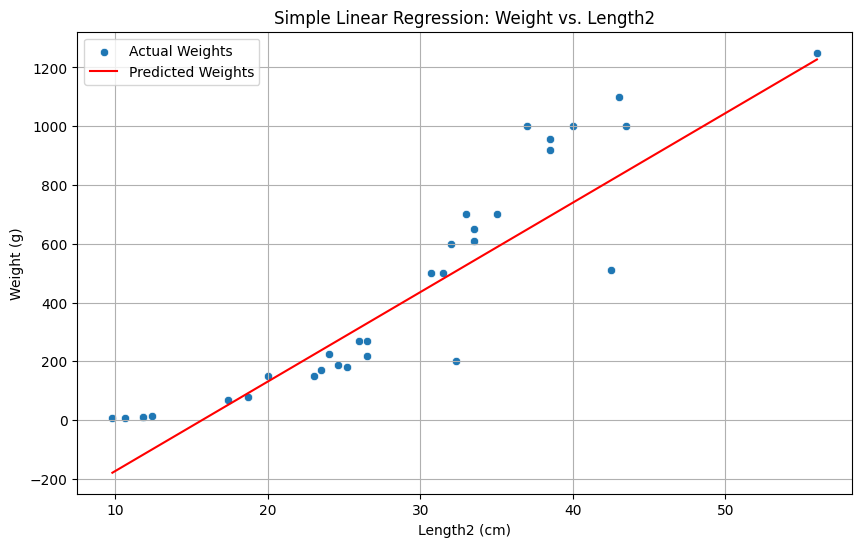

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Length2'], y=y_test, label='Actual Weights')
sns.lineplot(x=X_test['Length2'], y=y_pred, color='red', label='Predicted Weights')
plt.title('Simple Linear Regression: Weight vs. Length2')
plt.xlabel('Length2 (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid(True)
plt.show()

### **Residual Plot**

A residual plot helps us to check the assumptions of linear regression. Ideally, residuals should be randomly scattered around zero, with no discernible pattern.

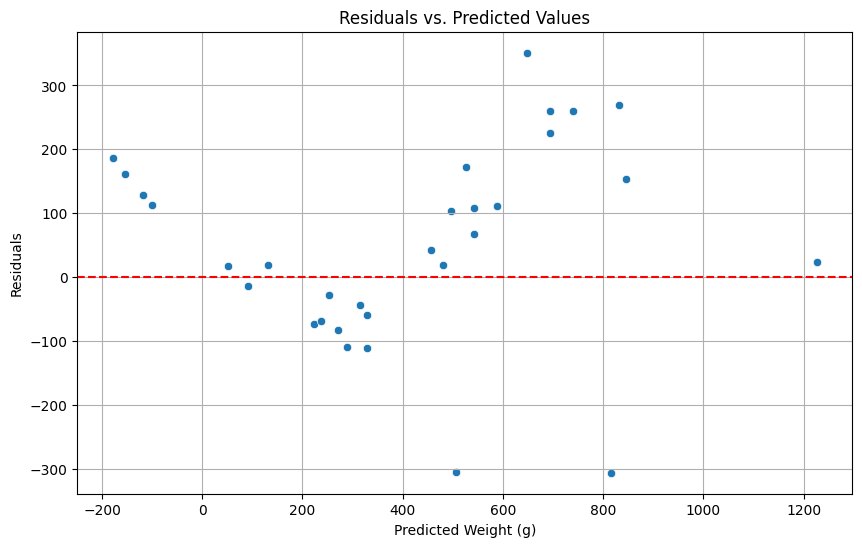

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Weight (g)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### **Distribution Plots**

Let's also look at the distribution of the 'Weight' and 'Length2' columns to understand their spread and detect any outliers.

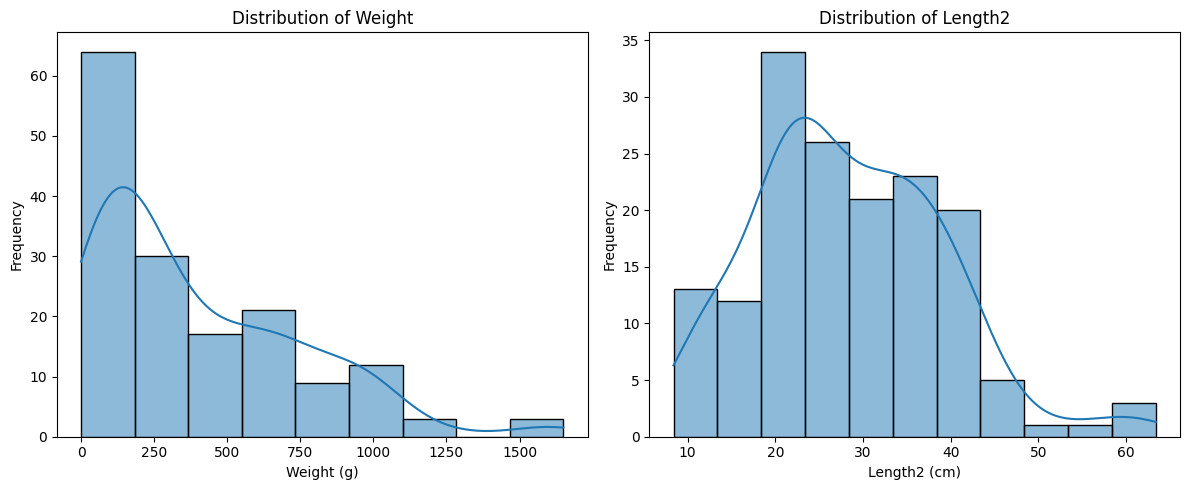

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Length2'], kde=True)
plt.title('Distribution of Length2')
plt.xlabel('Length2 (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()